<a href="https://colab.research.google.com/github/Hiji1023/mini_project/blob/main/pima_diabetes_DecisionTree2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* [부스트코스] 프로젝트로 배우는 데이터사이언스 > 3. 탐색한 데이터로 모델성능 개선 의 파일입니다.

https://www.boostcourse.org/ds214/joinLectures/40944

## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

#**1. 라이브러리 로드**#


In [374]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#**2 데이터셋 로드**#

In [375]:
df = pd.read_csv("http://bit.ly/data-diabetes-csv")
df.shape

(768, 9)

In [376]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [377]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#**3.Feature Engineering**
<br/>



##**3.1수치형 변수를 범주형 변수로 만들기**

###수치의 범위가 넓으면 수치형 변수의 조건이 너무 세분화되어 tree가 깊어짐
### 샘플의 수가 적으면 오버피팅 발생가능성이 높음
<br/>

###수치형 데이터를 범주화하여 성능을 높힌다.

In [378]:
df['Pregnancies_high'] = df['Pregnancies'] > 6
df[['Pregnancies', 'Pregnancies_high']].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


In [379]:
# One-Hot_Encoding
# 수치 -> 범주 -> 수치
df['Age_low'] = df['Age'] < 25
df['Age_middle'] = (df['Age'] >= 25) & (df['Age'] < 60)
df['Age_high'] = df['Age'] >=60
df[['Age', 'Age_low', 'Age_middle', 'Age_high']].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


<Axes: xlabel='Age_low', ylabel='count'>

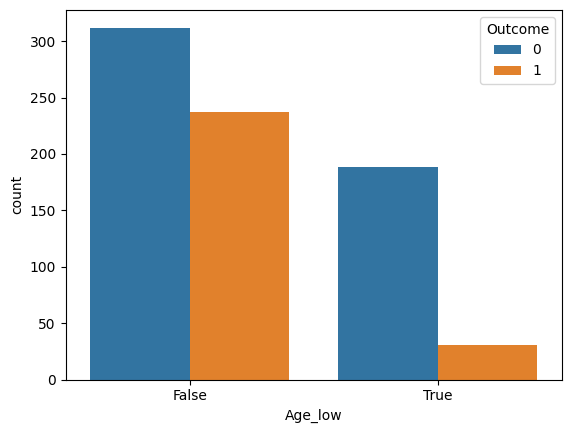

In [380]:
sns.countplot(data=df, x='Age_low', hue='Outcome')

##**3.2 결측치 다루기**

In [381]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
dtype: int64

In [382]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [383]:
df['Insulin_nan'] = df['Insulin'].replace(0, np.nan)
df[['Insulin', 'Insulin_nan']].head()

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0


In [384]:
df['Insulin_nan'].isnull().sum()

374

In [385]:
# 결측치 비율
df['Insulin_nan'].isnull().mean()

0.4869791666666667

In [386]:
df.groupby(['Outcome'])['Insulin', 'Insulin_nan'].agg(['mean', 'median'])

<ipython-input-386-e5d2ce224a86>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Outcome'])['Insulin', 'Insulin_nan'].agg(['mean', 'median'])


Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000   39.0  130.287879  102.5
1        100.335821    0.0  206.846154  169.5

In [387]:
# 결측치 채우기
df.loc[(df['Outcome'] == 1) & (df['Insulin_nan'].isnull()), 'Insulin_nan'] = 169.5
df.loc[(df['Outcome'] == 0) & (df['Insulin_nan'].isnull()), 'Insulin_nan'] = 102.5

##**3.3 왜도, 첨도**

<ipython-input-388-74f2e5810842>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['Insulin'] > 0, 'Insulin'])


<Axes: xlabel='Insulin', ylabel='Density'>

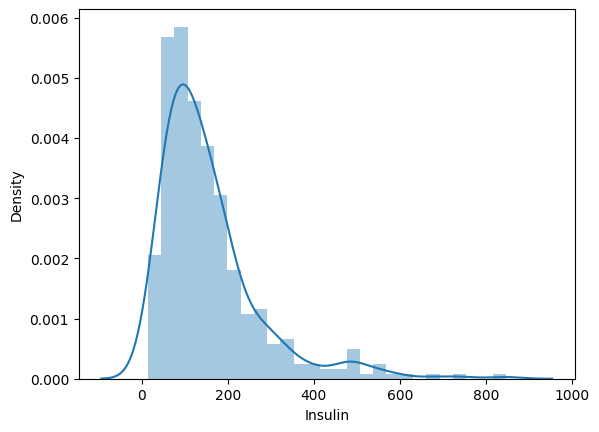

In [388]:
sns.distplot(df.loc[df['Insulin'] > 0, 'Insulin'])

<ipython-input-389-bc6caddabecd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df.loc[df['Insulin'] > 0, 'Insulin'] + 1))


<Axes: xlabel='Insulin', ylabel='Density'>

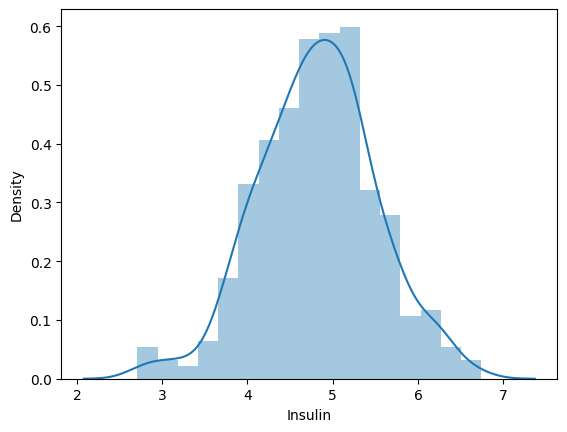

In [389]:
# + 1 하는 이유 : 0이하의 값에서 -로 수렴하는 것을 방지하기 위함
# log변환해주니 정규분포를 이룸
sns.distplot(np.log(df.loc[df['Insulin'] > 0, 'Insulin'] + 1))

<ipython-input-390-60a0e51b2ce1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Insulin_nan'])


<Axes: xlabel='Insulin_nan', ylabel='Density'>

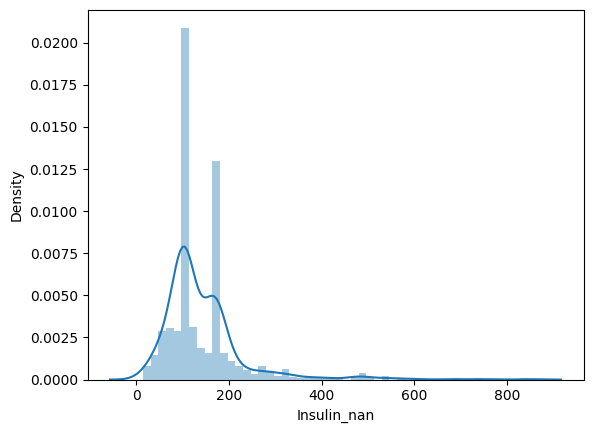

In [390]:
# 중앙값으로 채워줘 중앙값부분에 값이 많음
sns.distplot(df['Insulin_nan'])

##**3.4 파생변수 만들기**

<ipython-input-391-e0a573ce3d6d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Insulin_log'])


<Axes: xlabel='Insulin_log', ylabel='Density'>

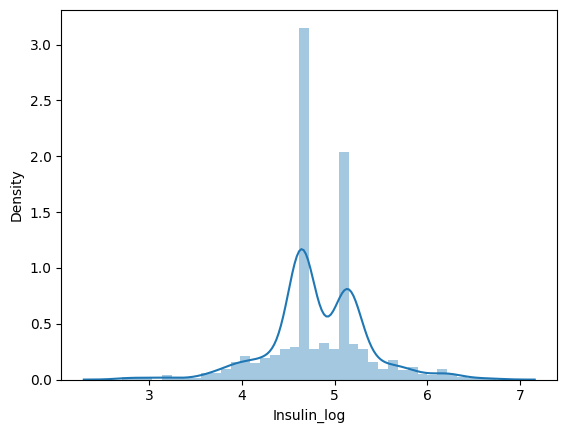

In [391]:
df['Insulin_log'] = np.log(df['Insulin_nan']+ 1)
sns.distplot(df['Insulin_log'])

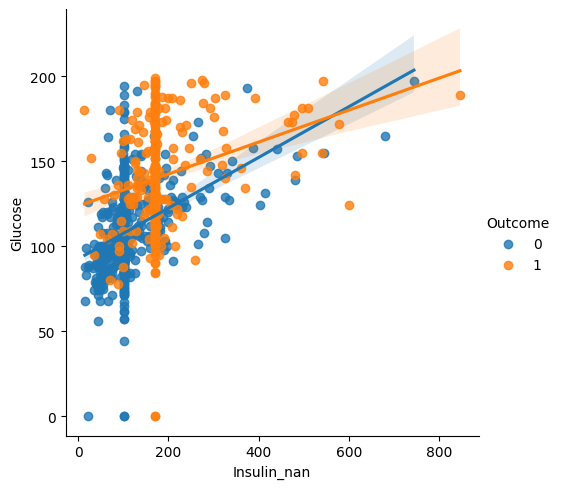

In [392]:
# 한 줄로 생기는 값 = 채워준 값이라 많이 분포되어 있음
sns.lmplot(data=df, x="Insulin_nan", y = "Glucose", hue="Outcome")

In [393]:
# 파생변수 만들기
df["low_glu_insulin"] = (df['Glucose'] < 100) & (df['Insulin_nan'] <= 102.5)
df["low_glu_insulin"]

0      False
1       True
2      False
3       True
4      False
       ...  
763    False
764    False
765    False
766    False
767     True
Name: low_glu_insulin, Length: 768, dtype: bool

In [394]:
pd.crosstab(df["Outcome"], df["low_glu_insulin"])

low_glu_insulin,False,True
Outcome,,
0,332,168
1,263,5


##**3.5 Outlier 다루기**

<Axes: xlabel='Insulin_nan'>

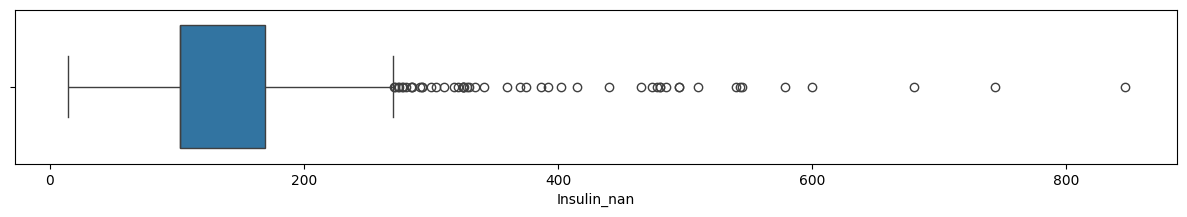

In [395]:
plt.figure(figsize=(15,2))
sns.boxplot(x =df["Insulin_nan"])

In [396]:
# 25%값과 50%값이 같은 이유 = 중앙값으로 채워줬기 때문
df["Insulin_nan"].describe()

count    768.000000
mean     141.753906
std       89.100847
min       14.000000
25%      102.500000
50%      102.500000
75%      169.500000
max      846.000000
Name: Insulin_nan, dtype: float64

In [397]:
IQR3 = df["Insulin_nan"].quantile(0.75)
IQR1 = df["Insulin_nan"].quantile(0.25)
IQR = IQR3 - IQR1
IQR

67.0

In [398]:
OUT = IQR3 + (IQR * 1.5)
OUT

270.0

In [399]:
df[df["Insulin_nan"] > OUT].shape

(51, 16)

In [400]:
# 이상치를 600이상만 제거
df[df["Insulin_nan"] > 600].shape

(3, 16)

##**3.6 Scaling**
<br/>

* https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [401]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,True,False,False,True,180.0,5.198497,False
764,2,122,70,27,0,36.8,0.340,27,0,False,False,True,False,102.5,4.639572,False
765,5,121,72,23,112,26.2,0.245,30,0,False,False,True,False,112.0,4.727388,False
766,1,126,60,0,0,30.1,0.349,47,1,False,False,True,False,169.5,5.138735,False


In [402]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[["Glucose","DiabetesPedigreeFunction"]])
scale = scaler.transform(df[["Glucose","DiabetesPedigreeFunction"]])

In [403]:
#df[["Glucose","DiabetesPedigreeFunction"]] = scale
#df[["Glucose","DiabetesPedigreeFunction"]].head()

array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>]],
      dtype=object)

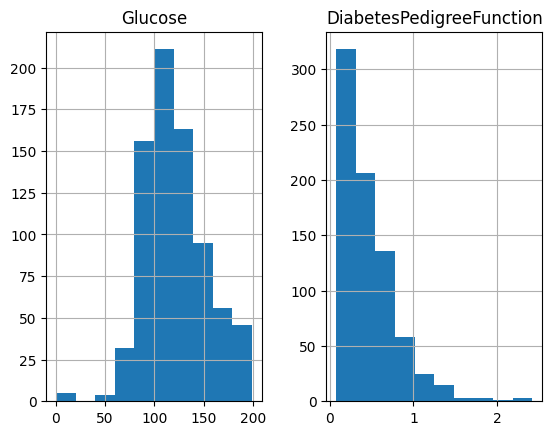

In [404]:
df[["Glucose","DiabetesPedigreeFunction"]].hist()

##**3.7 CSV 파일로 저장하**

In [430]:
df.to_csv("/content/sample_data/diabetes_feature.csv",index=False)

In [431]:
pd.read_csv("/content/sample_data/diabetes_feature.csv")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,True,False,False,True,180.0,5.198497,False
764,2,122,70,27,0,36.8,0.340,27,0,False,False,True,False,102.5,4.639572,False
765,5,121,72,23,112,26.2,0.245,30,0,False,False,True,False,112.0,4.727388,False
766,1,126,60,0,0,30.1,0.349,47,1,False,False,True,False,169.5,5.138735,False


#**4. 학습, 예측 데이터셋 나누기**#



In [405]:
# 8:2 비율로 구하기 위해 전체 데이터 행에서 80%위치에 해당하는 값을 구해 split_conut 라는 변수에 담습니다.
split_count = int(df.shape[0] * 0.8)
split_count

614

In [406]:
# train, test로 슬라이싱 통해 데이터를 나눕니다.
train = df[:split_count].copy()
train.shape

(614, 16)

In [407]:
# train data에서만 제거
train[train["Insulin_nan"] < 600].shape

(610, 16)

In [408]:
train = train[train["Insulin_nan"] < 600]
train.shape

(610, 16)

In [409]:
test = df[split_count:].copy()
test.shape

(154, 16)

#**5. 학습, 예측에 사용할 컬럼**#


In [410]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names = train.columns.tolist()
feature_names.remove('Pregnancies')
feature_names.remove('Outcome')
feature_names.remove('Age_low')
feature_names.remove('Age_middle')
feature_names.remove('Age_high')
feature_names.remove('Insulin')
feature_names.remove('Insulin_log')
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan',
 'low_glu_insulin']

#**6. 정답값이자 예측해야 될 값**#



In [411]:
# label_name 변수에 예축할 컬럼의 이름을 담습니다.
label_name = "Outcome"
label_name

'Outcome'

#**7. 학습, 예측 데이터셋 만들기**#

In [412]:
# 학습 세트 만들기 - 시험의 기출문제
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(610, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
0,148,72,35,33.6,0.627,50,False,169.5,False
1,85,66,29,26.6,0.351,31,False,102.5,True
2,183,64,0,23.3,0.672,32,True,169.5,False
3,89,66,23,28.1,0.167,21,False,94.0,True
4,137,40,35,43.1,2.288,33,False,168.0,False


In [413]:
# 정답값을 만들기 - 기출문제의 정답
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(610,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [414]:
# 예측에 사용할 데이터셋 만들기 - 실전 시험문제
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
614,138,74,26,36.1,0.557,50,True,144.0,False
615,106,72,0,25.8,0.207,27,False,102.5,False
616,117,96,0,28.7,0.157,30,False,102.5,False
617,68,62,13,20.1,0.257,23,False,15.0,True
618,112,82,24,28.2,1.282,50,True,169.5,False


In [415]:
# 예측의 정답값 - 실전 시험문제의 정답
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

#**8. 머신러닝 알고리즘 가져오기**#

In [416]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

#**9. 학습(훈련)**#

In [417]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

#**10. 예측**#

In [418]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1])

#**11. 트리알고리즘 분석하기**#

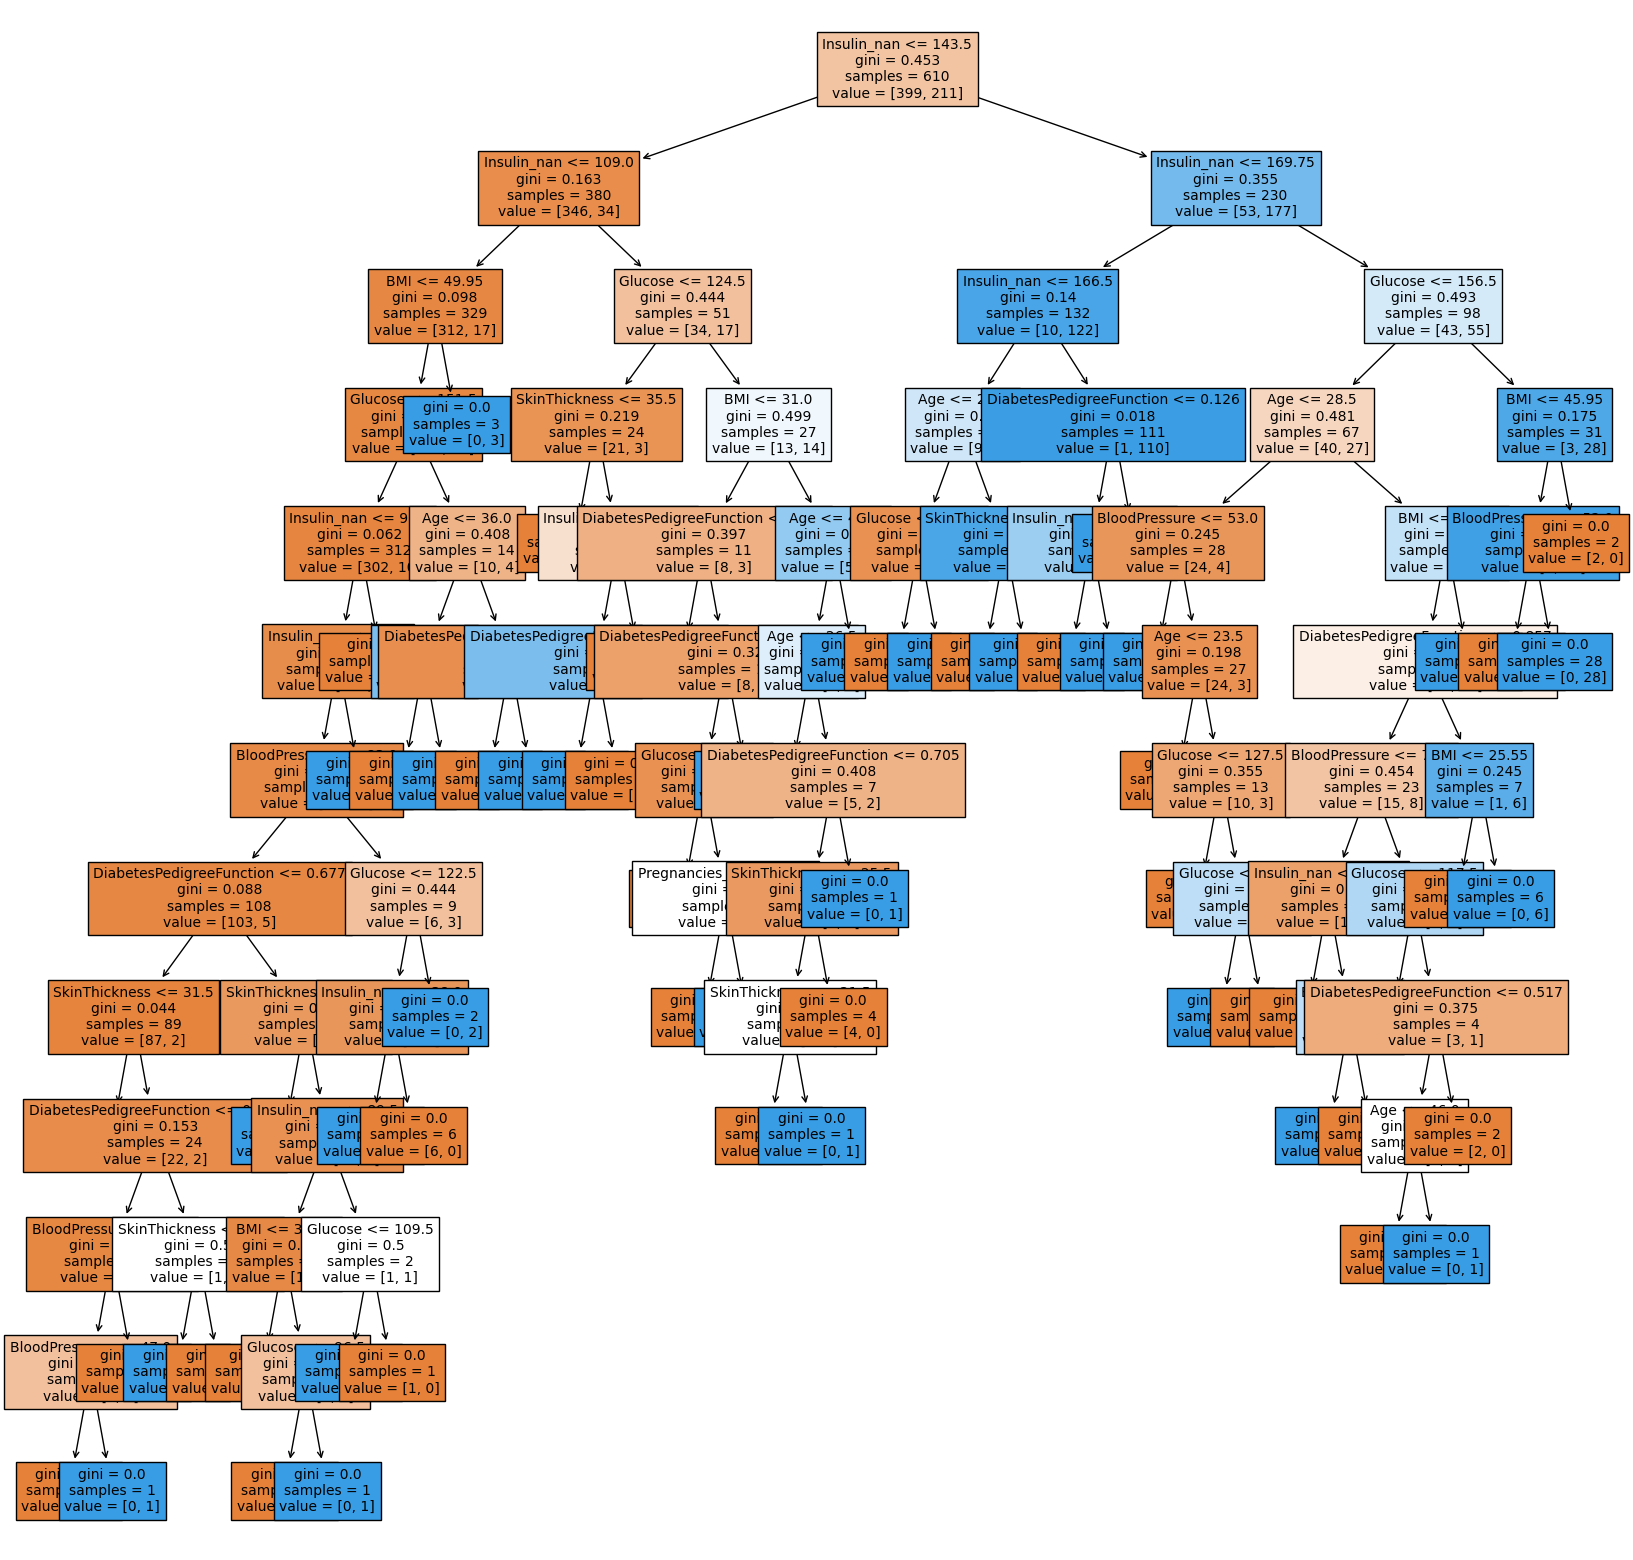

In [419]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(model,
                 feature_names = feature_names,
                 filled=True,
                 fontsize = 10)

In [420]:
# 피처의 중요도 추출하기
model.feature_importances_

array([0.1097948 , 0.03122008, 0.02920684, 0.0716271 , 0.04470941,
       0.08272508, 0.0036228 , 0.62709388, 0.        ])

<Axes: >

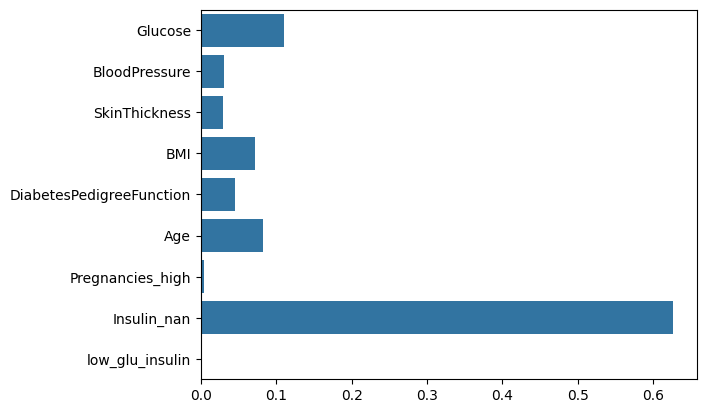

In [421]:
# 피처의 중요도 시각화하기
sns.barplot(x=model.feature_importances_, y = feature_names)

###Pregnancies와 달리 Pregnancies_high는 중요도가 떨어짐

#**12. 정확도(Accuracy) 예측하기**#

In [422]:
# 실제값-예측값 = 0 -> 같은 값, = 1 이면 다르게 예측한 값
# 44 => 38(Pregnancies) => 48(Age) => 24(Insulin 결측치를 평균으로 대체)
# => 18(Insulin결측치를 중앙값으로 대체, log처리) => 19(인슐린&글루코스 상관계수로 파생변수 생)
#=> 17(인슐린 이상치 제거) => 19(scaling)
diff_count = abs(y_test - y_predict).sum()
diff_count

18

In [423]:
# 예측의 정확도 구하기

(len(y_test) - diff_count) / len(y_test) * 100

88.31168831168831

In [424]:
# 구현된 알고리즘 가져와 사용
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)*100

88.31168831168831

In [425]:
# model의 score로 점수계산
model.score(X_test, y_test) *100

88.31168831168831